In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [8]:
load_iris = load_iris()

In [9]:
X = load_iris.data
y = load_iris.target
StandardScaler = StandardScaler()
X = StandardScaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [10]:
#cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=kf)
print("Cross-validation scores:", cross_val_scores)
# Stratified K-Folds cross-validator
cross_val_scores_stratified = cross_val_score(model, X, y, cv=stratified_kf)
print("Stratified cross-validation scores:", cross_val_scores_stratified)


Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Stratified cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 0.9       ]


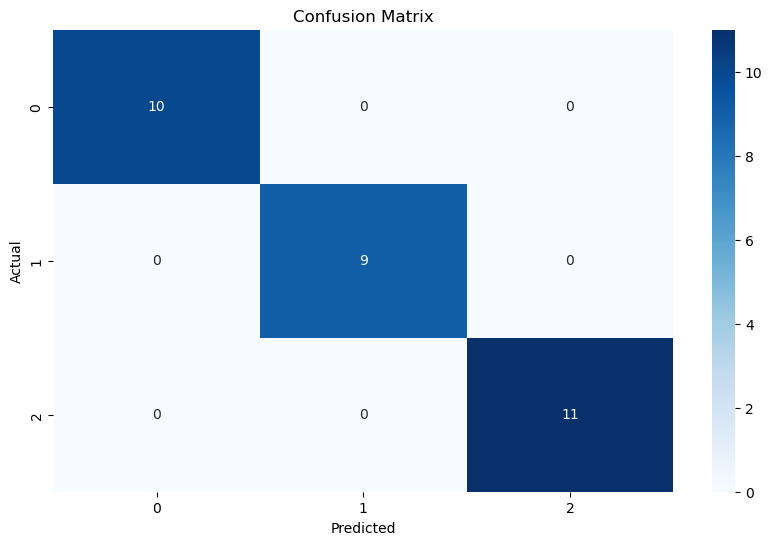

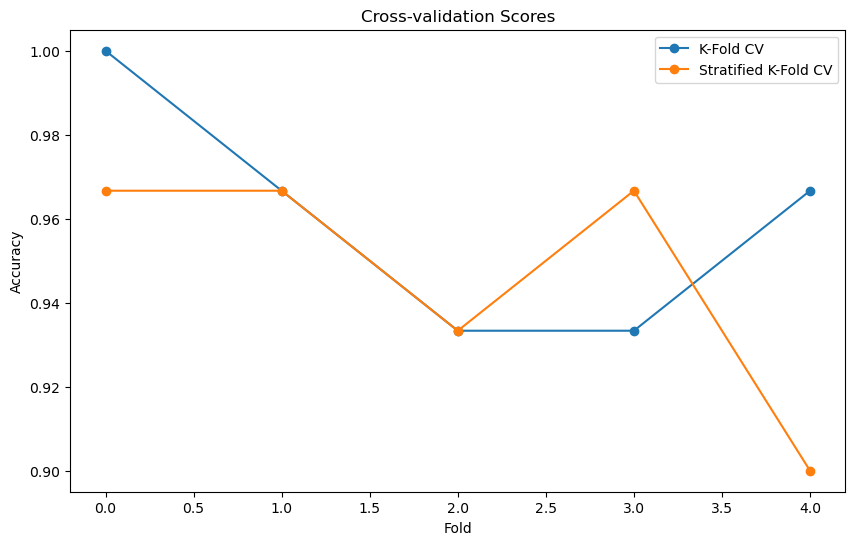

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cross_val_scores, label='K-Fold CV', marker='o')
plt.plot(cross_val_scores_stratified, label='Stratified K-Fold CV', marker='o')
plt.title('Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

